/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_46842/3567490885.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return (gamma * (-np.log(safe_beta))**(gamma-1) / safe_beta) * np.exp(-(-np.log(safe_beta))**gamma)


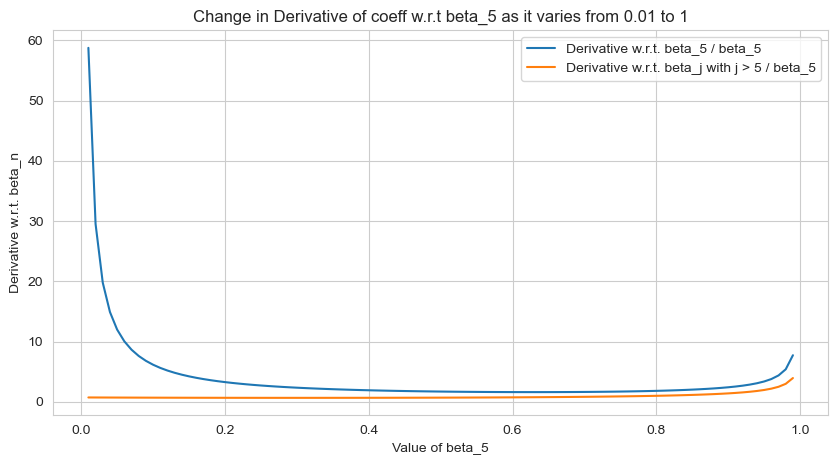

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the w function and its derivative for general gamma
def w(beta, gamma):
    epsilon = 1e-10
    safe_beta = beta + epsilon
    return np.exp(-(-np.log(safe_beta))**gamma)

def w_prime(beta, gamma):
    epsilon = 1e-10
    safe_beta = beta + epsilon
    return (gamma * (-np.log(safe_beta))**(gamma-1) / safe_beta) * np.exp(-(-np.log(safe_beta))**gamma)

# Number of terms in the sums
N = 10
gamma = 0.5  # You can change gamma here
n = 5  # Index for beta_n, variable beta

# Initialize betas array
initial_betas = np.random.rand(N)
initial_betas /= initial_betas.sum()  # Normalize to sum to 1

beta_n_values = np.linspace(0.01, 1, 100)
derivatives_beta_n = []
derivatives_beta_j = []

comp_beta_n = []
comp_beta_j = []

# Adjust the remaining betas for each beta_n value
for beta_n in beta_n_values:
    betas = initial_betas.copy()
    betas[n] = beta_n
    remaining_sum = 1 - beta_n
    if remaining_sum > 0:
        betas[np.arange(len(betas)) != n] = remaining_sum * initial_betas[np.arange(len(betas)) != n] / np.sum(initial_betas[np.arange(len(betas)) != n])
    else:
        betas[np.arange(len(betas)) != n] = 0
    
    # Compute the sums
    sum_geq_n = np.sum(betas[n:])
    sum_gt_n = np.sum(betas[n+1:])

    # Derivative w.r.t. beta_n
    deriv_beta_n = w_prime(sum_geq_n, gamma)
    deriv_beta_j = w_prime(sum_geq_n, gamma) - w_prime(sum_gt_n, gamma)

    derivatives_beta_n.append(deriv_beta_n)
    derivatives_beta_j.append(deriv_beta_j)

    frac_n = deriv_beta_n / beta_n
    frac_j = deriv_beta_j / beta_n

    comp_beta_n.append(frac_n)
    comp_beta_j.append(frac_j)

# Plotting using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
# sns.lineplot(x=beta_n_values, y=derivatives_beta_n, label='Derivative w.r.t. beta_5')
# sns.lineplot(x=beta_n_values, y=derivatives_beta_j, label='Derivative w.r.t. beta_j with j > 5')
sns.lineplot(x=beta_n_values, y=comp_beta_n, label='Derivative w.r.t. beta_5 / beta_5')
sns.lineplot(x=beta_n_values, y=comp_beta_j, label='Derivative w.r.t. beta_j with j > 5 / beta_5')

plt.xlabel(f'Value of beta_{n}')
plt.ylabel('Derivative w.r.t. beta_n')
plt.title(f'Change in Derivative of coeff w.r.t beta_{n} as it varies from 0.01 to 1')
plt.show()
